## 1

* Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
<br>zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
<br>ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
<br>Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
from scipy import stats as s
# Дано
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Изначально, предположим, что коэффициент = 1;
<br>- дальше данные о з/п умножаются на этот коэффициент;
<br>- происходит проверка того, большая ли разница между кр.скорингом и произведением з/п на случайное число;
<br>- если в результате увеличения коэффициента разница уменьшается, то коэффициент будет увеличен (например, в 0,001 раз);
<br>- если же разница увеличилась, то коэффициент немного уменьшается (в те же 0,001 раз, например)

# Без интерсепта

In [2]:
coef,coef_ = 1,1
diff = np.inf
ks_estemated = zp * coef
diff_new = sum((ks - ks_estemated)**2)
c_diff = 0.00001
while diff_new<diff:
    diff = sum((ks - ks_estemated)**2)
    if diff_new>sum((ks - zp * (coef - coef*c_diff))**2):
        coef = coef - coef*c_diff
    else:
        coef = coef + coef*c_diff
        
    if coef > 4*coef_ or coef_ > 4*coef:
        c_diff = c_diff/10
        coef_ = coef
    ks_estemated = zp * coef
    intercept = np.mean(ks - ks_estemated)
    ks_estemated = zp * coef
    diff_new = sum((ks - ks_estemated)**2)
    # print('\r',diff_new,end = '', flush = True) # если надо вывести на экран, увеличте параметр c_diff
ks_estemated = zp * coef
intercept = np.mean(ks - ks_estemated)
ks_estemated2 = zp * coef
coef

5.8898284702117705

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept = False)
lr.fit(np.array([np.zeros_like(zp),zp]).T,ks)
lr.coef_,lr.intercept_

(array([0.        , 5.88982042]), 0.0)

Без интерсепта метод подбора дал <s>почти</s> тот же самый результат

## С интерсептом

In [4]:
coef,coef_ = 1,1
diff = np.inf
ks_estemated = zp * coef
diff_new = sum((ks - ks_estemated)**2)
c_diff = 0.00001
while diff_new<diff:
    diff = sum((ks - ks_estemated)**2)
    if diff_new>sum((ks - zp * (coef - coef*c_diff))**2):
        coef = coef - coef*c_diff
    else:
        coef = coef + coef*c_diff
        
    if coef > 2*coef_ or coef_ > 2*coef:
        c_diff = c_diff/10
        coef_ = coef
    ks_estemated = zp * coef
    intercept = np.mean(ks - ks_estemated)
    ks_estemated = zp * coef + intercept
    diff_new = sum((ks - ks_estemated)**2)
    # print('\r',diff_new,end = '', flush = True) # если надо вывести на экран, увеличте параметр c_diff
ks_estemated = zp * coef
intercept = np.mean(ks - ks_estemated)
ks_estemated = zp * coef + intercept
coef,intercept

(2.6205426092849575, 444.1769794185053)

Расчетный метод

In [5]:
zp_squared_diff = sum(np.square(zp)) - (sum(zp)**2)/len(zp)
zp_diff = sum(zp*ks) - (sum(zp)*sum(ks))/len(zp)
coeff_est = zp_diff / zp_squared_diff
intercept_est = np.mean(ks) - np.mean(zp) * coeff_est
coeff_est, intercept_est

(2.6205388824027667, 444.17735732435943)

результат подбора почти соответствует результату расчетов по формулам

Матрицы:

In [6]:
zpz = np.matrix(np.array([np.ones_like(zp),zp]))
np.dot(np.dot(np.linalg.inv(zpz * zpz.T), zpz), ks)

matrix([[444.17735732,   2.62053888]])

результаты расчета по формулам и с использованием матриц совпадают

Сравним с результатом LinearRegression из библиотеки sklearn

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(np.array([np.ones_like(zp),zp]).T,ks)
ks_lr = zp * lr.coef_[1] +lr.intercept_ 
lr.coef_,lr.intercept_

(array([0.        , 2.62053888]), 444.1773573243595)

In [8]:
print(coef,intercept,'- Это коэффициент и интерсепт, полученные методом подбора')

2.6205426092849575 444.1769794185053 - Это коэффициент и интерсепт, полученные методом подбора


In [9]:
std_results = sum((ks - ks_lr)**2)**0.5,'(LinearRegression) и',sum((ks - ks_estemated)**2)**0.5, '(методом подбора)'
print('Стандартное отклонение:',*std_results)

Стандартное отклонение: 254.37008867350457 (LinearRegression) и 254.37008867445877 (методом подбора)


Подбор дал <s>почти</s> тот же результат!

## Графики

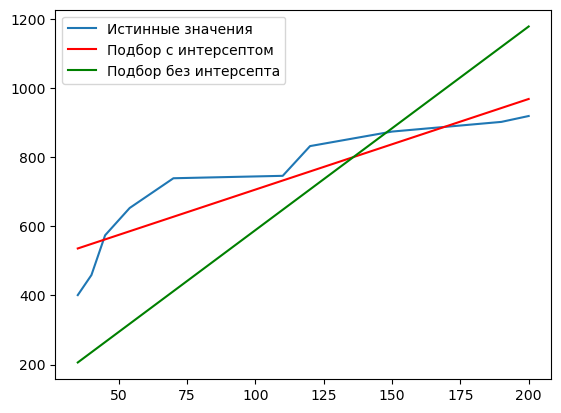

In [11]:
from matplotlib import pyplot as plt
plt.plot(np.sort(np.array([zp,ks]))[0],np.sort(np.array([zp,ks]))[1],label='Истинные значения')
plt.plot(np.sort(np.array([zp,ks_estemated]))[0],np.sort(np.array([zp,ks_estemated]))[1],c='r',label='Подбор с интерсептом')
plt.plot(np.sort(np.array([zp,ks_estemated2]))[0],np.sort(np.array([zp,ks_estemated2]))[1],c='g',label='Подбор без интерсепта')
plt.legend()
plt.show()

## 2. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Таблицы используются для определения вероятности попасть в определенный интервал (т.е. сумма вероятностей, или интеграл, уже вычислена). А критические точки - для определения вероятности оказаться ниже/выше этой точк; в этом случае надо еще определить сумму вероятностей, если требуется определить вероятность попадания в интервал.